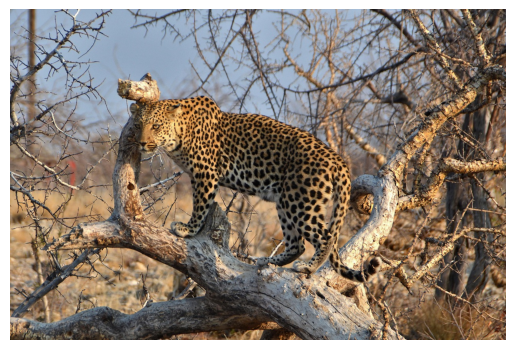

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import requests
from io import BytesIO

# Bild-URL
image_url = "https://cdn.pixabay.com/photo/2020/05/17/21/07/namibia-5183577_1280.jpg"

try:
    response = requests.get(image_url, stream=True)
    response.raise_for_status()  # Überprüfen auf HTTP-Fehler

    image = Image.open(BytesIO(response.content))
    image_np = np.array(image)

    plt.imshow(image_np)
    plt.axis('off') # Achsen ausblenden
    plt.show()

except requests.exceptions.RequestException as e:
    print(f"Fehler beim Herunterladen des Bildes: {e}")

except Exception as e:
    print(f"Ein Fehler ist aufgetreten: {e}")

Graustufen-Bild-Form: (853, 1280)
Graustufen-Daten-Typ: float64


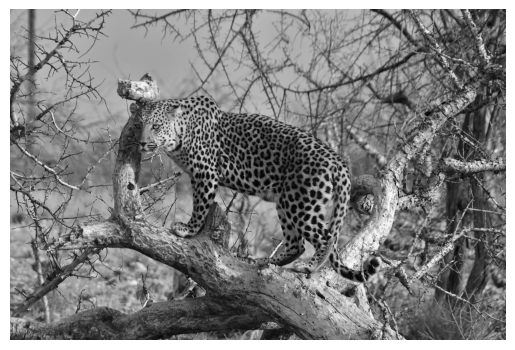

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Konvertierung in Graustufen
image_gray = image.convert("L")
image_gray_np = np.array(image_gray)

image_gray_np = (image_gray_np+min(image_gray_np.flatten())) / (max(image_gray_np.flatten())+min(image_gray_np.flatten()))

print("Graustufen-Bild-Form:", image_gray_np.shape)
print("Graustufen-Daten-Typ:", image_gray_np.dtype)

plt.imshow(image_gray_np, cmap='gray')
plt.axis('off')
plt.show()

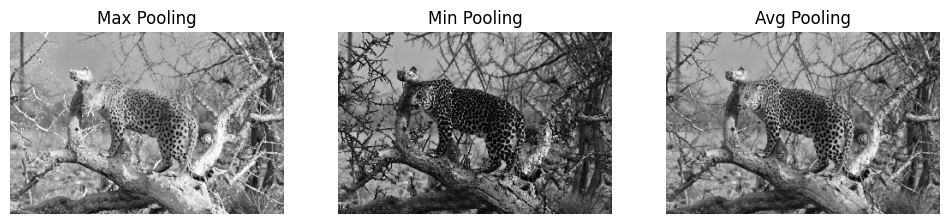

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import math

def max_pooling(image, pool_size):
    image_height, image_width = image.shape
    pooled_height = image_height // pool_size
    pooled_width = image_width // pool_size
    pooled_image = np.zeros((pooled_height, pooled_width))
    for i in range(pooled_height):
        for j in range(pooled_width):
            region = image[i * pool_size:(i + 1) * pool_size, j * pool_size:(j + 1) * pool_size]
            pooled_image[i, j] = np.max(region)
    return pooled_image

def min_pooling(image, pool_size):
    image_height, image_width = image.shape
    pooled_height = image_height // pool_size
    pooled_width = image_width // pool_size
    pooled_image = np.zeros((pooled_height, pooled_width))
    for i in range(pooled_height):
        for j in range(pooled_width):
            region = image[i * pool_size:(i + 1) * pool_size, j * pool_size:(j + 1) * pool_size]
            pooled_image[i, j] = np.min(region)
    return pooled_image

def avg_pooling(image, pool_size):
    image_height, image_width = image.shape
    pooled_height = image_height // pool_size
    pooled_width = image_width // pool_size
    pooled_image = np.zeros((pooled_height, pooled_width))
    for i in range(pooled_height):
        for j in range(pooled_width):
            region = image[i * pool_size:(i + 1) * pool_size, j * pool_size:(j + 1) * pool_size]
            pooled_image[i, j] = np.mean(region)
    return pooled_image


# Beispiel für Pooling (Größe 4x4)
pool_size = 4
max_pooled_image = max_pooling(image_gray_np, pool_size)
min_pooled_image = min_pooling(image_gray_np, pool_size)
avg_pooled_image = avg_pooling(image_gray_np, pool_size)

# Anzeigen der gepoolten Bilder
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.imshow(max_pooled_image, cmap='gray')
plt.title('Max Pooling')
plt.axis('off')

plt.subplot(132)
plt.imshow(min_pooled_image, cmap='gray')
plt.title('Min Pooling')
plt.axis('off')

plt.subplot(133)
plt.imshow(avg_pooled_image, cmap='gray')
plt.title('Avg Pooling')
plt.axis('off')

plt.show()


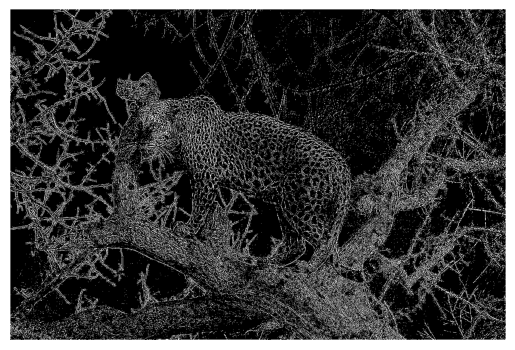

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math

def apply_kernel(image, kernel, stride = 1, activation=lambda x: x):
    """Anwenden des Kernels auf ein Bild.

    Args:
      image: Ein Numpy Array welches das Bild repräsentiert.
      kernel: Ein Numpy Array welches den Kernel repräsentiert.

    Returns:
      Ein Numpy Array welches das gefilterte Bild repräsentiert.
    """

    kernel_height, kernel_width = kernel.shape
    image_height, image_width = image.shape

    # Berechnen des Paddings
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant')
    filtered_image = np.ndarray([image.shape[0]//stride, image.shape[1]//stride], dtype=float)

    for i in range(image_height//stride):
        for j in range(image_width//stride):
            region = padded_image[i*stride:i*stride + kernel_height, j*stride:j*stride + kernel_width]
            filtered_image[i, j] = activation(np.sum(region * kernel))

    return filtered_image # Convert back to uint8

# Beispiel Kernel (z.B. Kannten-Filter)
kernel = np.array([
    [0, -1, 0],
    [-1, 4, -1],
    [0, -1, 0]
])

# Kernel anwenden
filtered_image = apply_kernel(image_gray_np, kernel, 1, lambda x: 1 if x > 0.1 else 0)

# Ergebnis anzeigen
plt.imshow(filtered_image, cmap='gray')
plt.axis('off')
plt.show()